In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def get_results():
  test_sizes = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  test_size = 0.4
  X,y = load_wine(return_X_y=True)
  gnb = GaussianNB()
  while(test_size >= 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='micro'))
    recall.append(recall_score(y_test, y_pred, average='micro'))
    f1.append(f1_score(y_test, y_pred, average='micro'))
    test_sizes.append(test_size)
    test_size -= 0.05
  return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1":f1, "test_sizes": test_sizes}

In [3]:
results = get_results()

In [4]:
result_to_json = {"bayesian": results}
with open('metrics.json', mode='w', encoding='utf-8') as f:
  json.dump(result_to_json, f)

In [5]:
def draw_results(results):
  accuracy = results['accuracy']
  precision = results['precision']
  recall = results['recall']
  f1 = results['f1']
  test_sizes = results['test_sizes']
  
  fig, ax = plt.subplots(2, 2, figsize = (15, 13))

  ax[0, 0].plot(test_sizes, accuracy)
  ax[0, 0].set_title('Accuracy scores')
  ax[0, 0].set(xlabel = 'Размер тестовой выборки')

  ax[0, 1].plot(test_sizes, precision)
  ax[0, 1].set_title('Precision scores')
  ax[0, 1].set(xlabel = 'Размер тестовой выборки')

  ax[1, 0].plot(test_sizes, recall)
  ax[1, 0].set_title('Recall scores')
  ax[1, 0].set(xlabel = 'Размер тестовой выборки')

  ax[1, 1].plot(test_sizes, f1)
  ax[1, 1].set_title('F1 scores')
  ax[1, 1].set(xlabel = 'Размер тестовой выборки')
  plt.show()

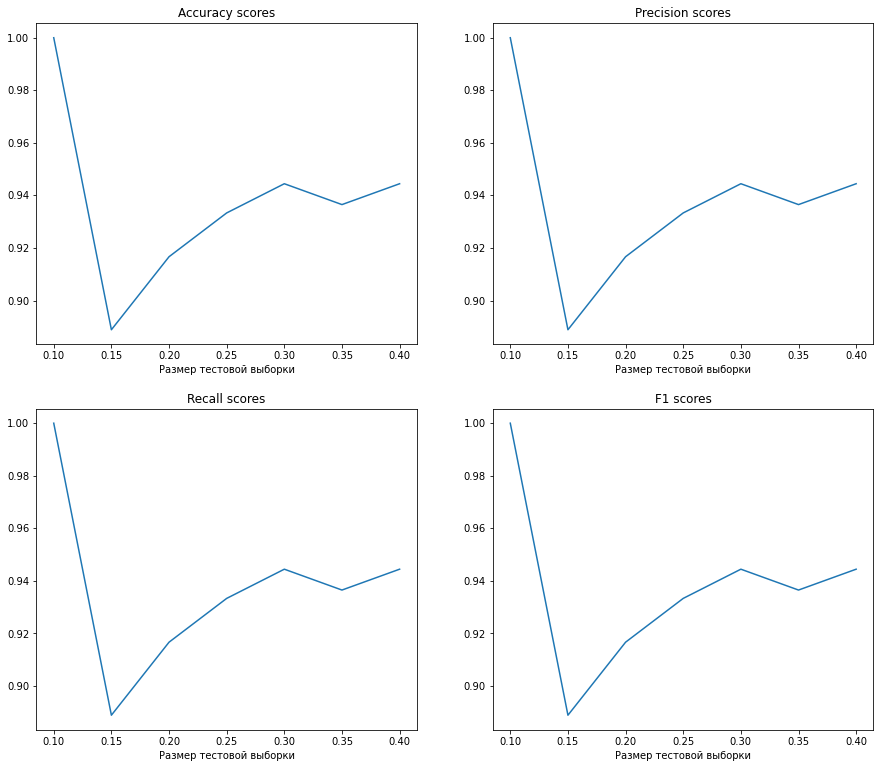

In [6]:
draw_results(results)